In [1]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

In [216]:
from utilities import *

In [3]:
# Load the sound file
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')
fs_chords, wav_chords = wavfile.read('../samples/Chords.wav')

wav_bells = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano = wav_piano.astype(np.double)
wav_chords = wav_chords.astype(np.double)

freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)
freq_chords, time_chords, spectrogram_chords = sg.spectrogram(wav_chords, fs_chords, nperseg=16384)

In [5]:
sound = AudioSegment.from_wav("../samples/186_two-piano-chords.wav")
sound = sound.set_channels(1)
sound.export("../samples/Chords.wav", format="wav")

fs_chords, wav_chords = wavfile.read('../samples/Chords.wav')

wav_chords = wav_chords.astype(np.double)

freq_chords, time_chords, spectrogram_chords = sg.spectrogram(wav_chords, fs_chords, nperseg=16384)

In [6]:
argsort_bells  = np.argsort(spectrogram_bells,  axis=0)
argsort_guitar = np.argsort(spectrogram_guitar, axis=0)
argsort_piano  = np.argsort(spectrogram_piano,  axis=0)
argsort_chords = np.argsort(spectrogram_chords, axis=0)


In [47]:
def make_corrections(spec, freq):
    note_freq = frequencies('C0', 'C8')
    rows = []
    for i in range(1, len(note_freq)-1):
        low  = note_freq[i] - (1/2)*(note_freq[i]-note_freq[i-1])
        high = note_freq[i] + (1/2)*(note_freq[i+1]-note_freq[i])
        ind  = (freq>=low)&(freq<=high)
        row  = spec[ind,:].sum(0) # Average it
        if (ind.sum() > 0):
             row /= ind.sum()
        rows.append(row)
    data = np.asarray(rows)
    return data, note_freq[1:-1]

In [48]:
corr_bells, nf_bells   = make_corrections(spectrogram_bells,  freq_bells)
corr_guitar, nf_guitar = make_corrections(spectrogram_guitar, freq_guitar)
corr_piano, nf_piano   = make_corrections(spectrogram_piano,  freq_piano)
corr_chords, nf_chords = make_corrections(spectrogram_chords, freq_chords)

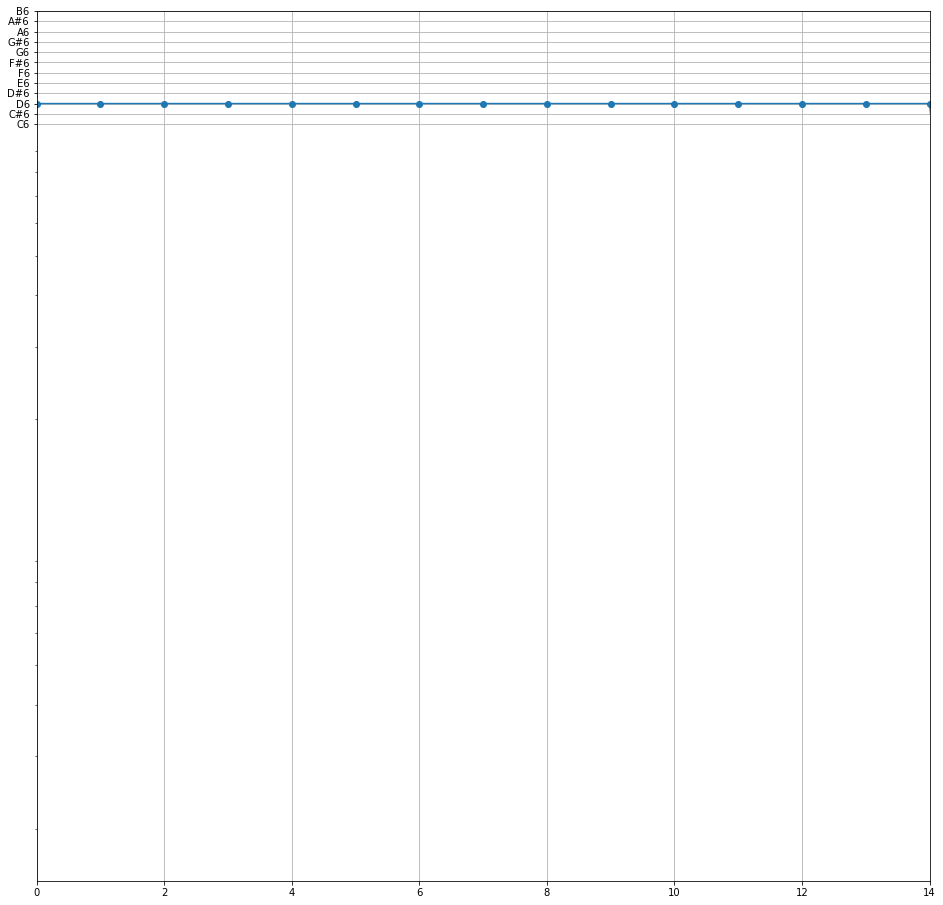

In [49]:
plt.figure(figsize=(16,16))
plt.plot(nf_bells[corr_bells.argmax(axis=0)], 'o-')
# plt.plot(nf_bells[argsort_bells[-2]], 'o')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C6', 'C7'),
           note_names('C6', 'C7'))
# plt.xlim(0,14)
plt.gca().grid(True)
plt.gca().set_aspect('auto')

In [50]:
# Ordered by Decibal Rating?
argsort_bells.shape

(8193, 26)

In [51]:
# Note Frequencies that have been used
nf_bells.shape

(94,)

In [52]:
# Frequencies of the sound
freq_bells.shape

(8193,)

In [53]:
# Correcting the wonky notes
corr_bells.shape

(94, 26)

In [177]:
[corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-2][1:-2])]

[0.06361931550299459,
 2260.985134473716,
 2272.2621540766468,
 1489.4467065813399,
 1545.9443956337761,
 1474.2919744089925,
 1606.6538319467859,
 1548.4341250565208,
 1651.407131080323,
 1616.5787607883171,
 1864.7149171244441]

In [143]:
argsort_guitar2 = np.argsort(corr_guitar, axis=0)

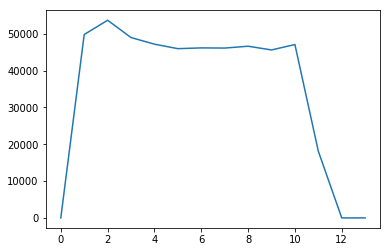

In [164]:
plt.plot(corr_guitar[1:-2].max(axis=0))

In [166]:
plt.plot(corr_guitar[argsort_guitar2[-2,:][:,1:-2],:])

IndexError: invalid index to scalar variable.

(0, 50)

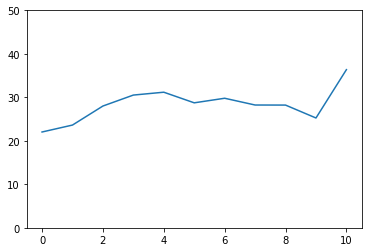

In [212]:
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-2][1:-2], 1)])
plt.ylim(0, 50)

(0, 50)

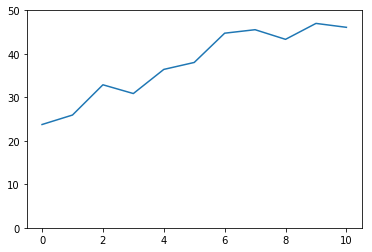

In [213]:
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-3][1:-2], 1)])
plt.ylim(0, 50)

(0, 50)

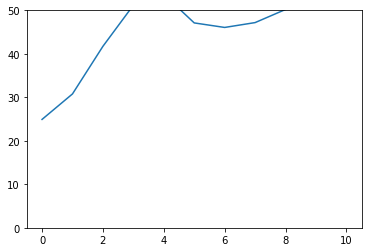

In [215]:
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-4][1:-2], 1)])
plt.ylim(0, 50)

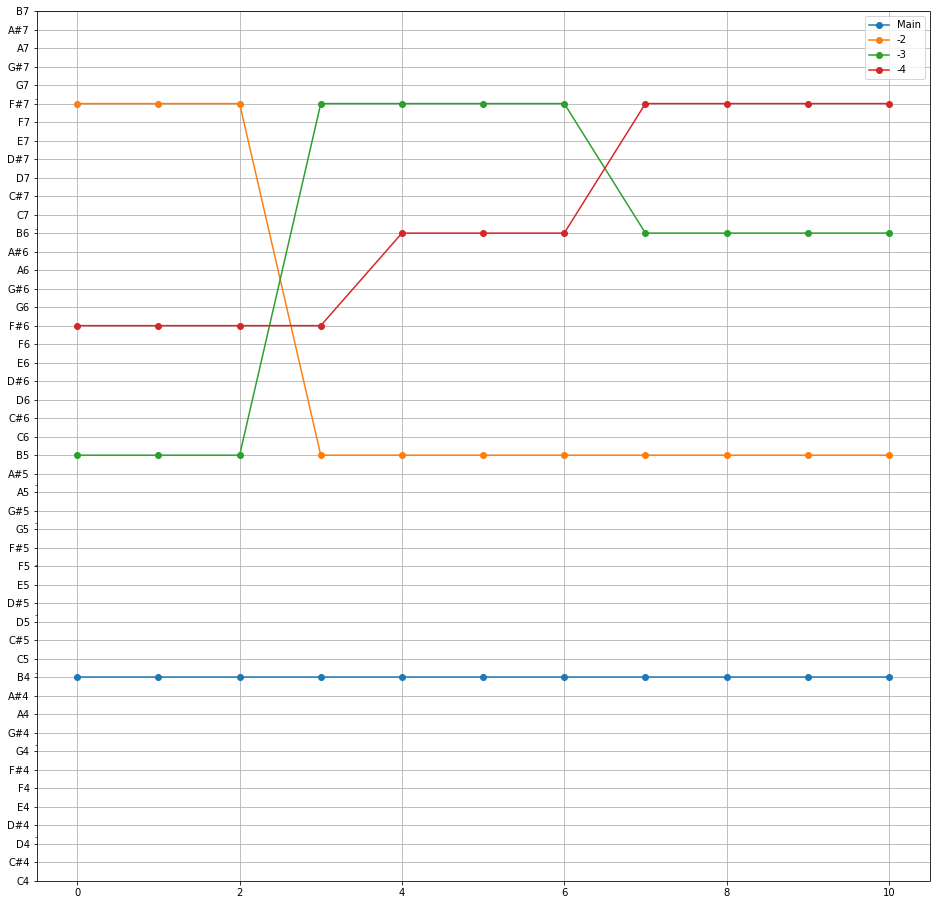

In [149]:
plt.figure(figsize=(16,16))
plt.plot(nf_guitar[corr_guitar.argmax(axis=0)][1:-2], 'o-', label='Main')
# plt.plot(nf_guitar[argsort_guitar2[-1]][1:-2], 'o-', label='-1')
plt.plot(nf_guitar[argsort_guitar2[-2]][1:-2], 'o-', label='-2')
plt.plot(nf_guitar[argsort_guitar2[-3]][1:-2], 'o-', label='-3')
plt.plot(nf_guitar[argsort_guitar2[-4]][1:-2], 'o-', label='-4')
# plt.plot(nf_guitar[argsort_guitar2[-5]][1:-2], 'o-', label='-5')
# plt.plot(nf_guitar[argsort_guitar2[-6]][1:-2], 'o-', label='-6')
# plt.plot(nf_guitar[argsort_guitar2[-7]][1:-2], 'o-', label='-7')
# plt.plot(nf_guitar[argsort_guitar2[-8]][1:-2], 'o-', label='-8')
# plt.plot(nf_guitar[argsort_guitar2[-9]][1:-2], 'o-', label='-9')
# plt.plot(nf_guitar[argsort_guitar2[-10]][1:-2], 'o-', label='-10')

plt.legend()
plt.gca().set_yscale("log")
plt.yticks(frequencies('C4', 'C8'),
           note_names('C4', 'C8'))
# plt.xlim(1,11)
plt.gca().grid(True)
plt.gca().set_aspect('auto')

In [55]:
# Ordered by Decibal Rating?
argsort_guitar.shape

(8193, 14)

In [56]:
# Note Frequencies that have been used
nf_guitar.shape

(94,)

In [57]:
# Frequencies of the sound
freq_guitar.shape

(8193,)

In [58]:
# Correcting the wonky notes
corr_guitar.shape

(94, 14)

In [112]:
def ratios(val_1, val_2):
    rat = []
    for v in val_1:
        rat.append(val_2/val_1)
    return rat

In [114]:
ratios(nf_guitar[corr_guitar.argmax(axis=0)][1:-2], freq_guitar[argsort_guitar[-1]][1:-2])

[array([1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488]),
 array([1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488]),
 array([1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488]),
 array([1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488]),
 array([1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488]),
 array([1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488, 1.01369488, 1.01369488, 1.01369488, 1.01369488,
        1.01369488]),
 array([1.01369488, 1.01369488, 1.01369488, 1.013694

In [115]:
ratios(nf_guitar[corr_guitar.argmax(axis=0)][1:-2], freq_guitar[argsort_guitar[-2]][1:-2])

[array([6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        1.01914485]),
 array([6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        1.01914485]),
 array([6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        1.01914485]),
 array([6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        1.01914485]),
 array([6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        1.01914485]),
 array([6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        6.07671929, 6.07671929, 6.07671929, 6.07671929, 6.07671929,
        1.01914485]),
 array([6.07671929, 6.07671929, 6.07671929, 6.076719

In [116]:
ratios(nf_guitar[corr_guitar.argmax(axis=0)][1:-2], freq_guitar[argsort_guitar[-3]][1:-2])

[array([1.00824491, 1.00824491, 1.00824491, 1.00824491, 1.00824491,
        1.00824491, 1.00824491, 2.02738976, 2.02738976, 1.00824491,
        1.00824491]),
 array([1.00824491, 1.00824491, 1.00824491, 1.00824491, 1.00824491,
        1.00824491, 1.00824491, 2.02738976, 2.02738976, 1.00824491,
        1.00824491]),
 array([1.00824491, 1.00824491, 1.00824491, 1.00824491, 1.00824491,
        1.00824491, 1.00824491, 2.02738976, 2.02738976, 1.00824491,
        1.00824491]),
 array([1.00824491, 1.00824491, 1.00824491, 1.00824491, 1.00824491,
        1.00824491, 1.00824491, 2.02738976, 2.02738976, 1.00824491,
        1.00824491]),
 array([1.00824491, 1.00824491, 1.00824491, 1.00824491, 1.00824491,
        1.00824491, 1.00824491, 2.02738976, 2.02738976, 1.00824491,
        1.00824491]),
 array([1.00824491, 1.00824491, 1.00824491, 1.00824491, 1.00824491,
        1.00824491, 1.00824491, 2.02738976, 2.02738976, 1.00824491,
        1.00824491]),
 array([1.00824491, 1.00824491, 1.00824491, 1.008244

In [117]:
ratios(nf_guitar[corr_guitar.argmax(axis=0)][1:-2], freq_guitar[argsort_guitar[-4]][1:-2])

[array([3.04108463, 5.06302442, 5.06302442, 5.06302442, 5.06302442,
        2.02738976, 2.02738976, 1.00824491, 4.05477951, 2.02738976,
        4.05477951]),
 array([3.04108463, 5.06302442, 5.06302442, 5.06302442, 5.06302442,
        2.02738976, 2.02738976, 1.00824491, 4.05477951, 2.02738976,
        4.05477951]),
 array([3.04108463, 5.06302442, 5.06302442, 5.06302442, 5.06302442,
        2.02738976, 2.02738976, 1.00824491, 4.05477951, 2.02738976,
        4.05477951]),
 array([3.04108463, 5.06302442, 5.06302442, 5.06302442, 5.06302442,
        2.02738976, 2.02738976, 1.00824491, 4.05477951, 2.02738976,
        4.05477951]),
 array([3.04108463, 5.06302442, 5.06302442, 5.06302442, 5.06302442,
        2.02738976, 2.02738976, 1.00824491, 4.05477951, 2.02738976,
        4.05477951]),
 array([3.04108463, 5.06302442, 5.06302442, 5.06302442, 5.06302442,
        2.02738976, 2.02738976, 1.00824491, 4.05477951, 2.02738976,
        4.05477951]),
 array([3.04108463, 5.06302442, 5.06302442, 5.063024

In [120]:
numchunks=100
chunks = np.array_split(wav_piano, numchunks)
dbs = [20*np.log10(np.sqrt(np.mean(chunk**2)) ) for chunk in chunks]

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


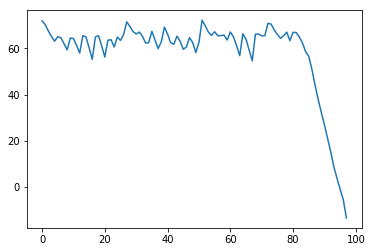

In [122]:
plt.plot(dbs)

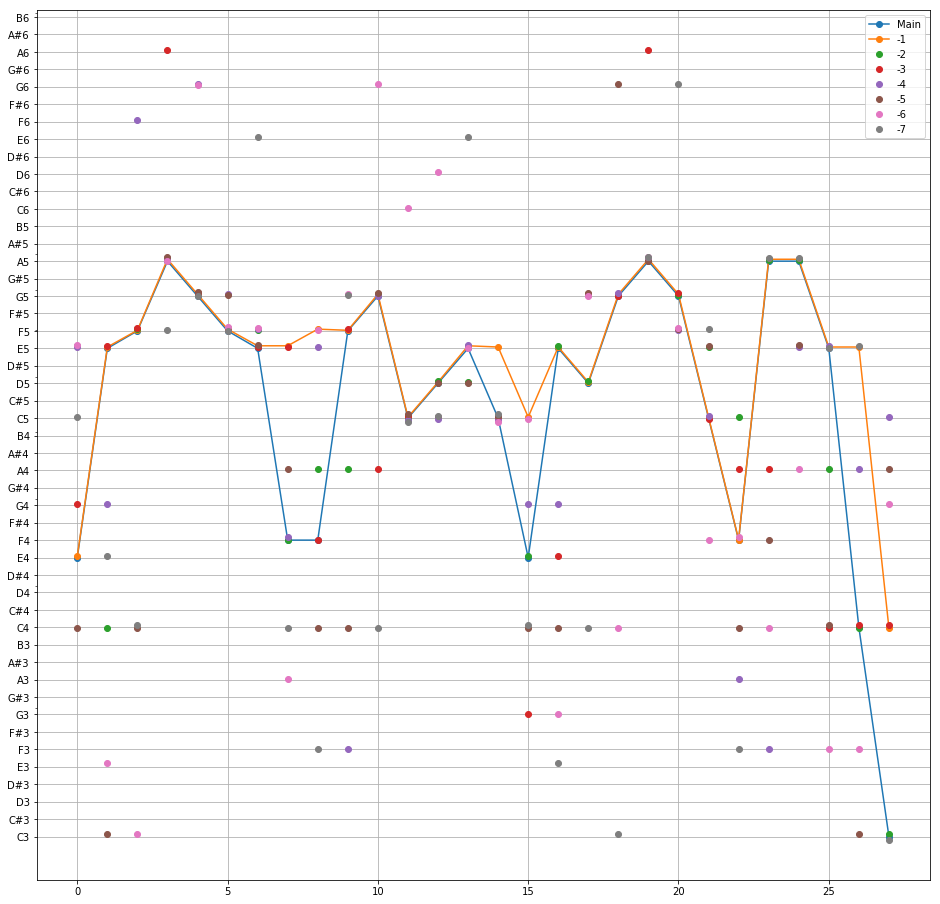

In [81]:
plt.figure(figsize=(16,16))
plt.plot(nf_piano[corr_piano.argmax(axis=0)][1:-2], 'o-', label='Main')
plt.plot(freq_piano[argsort_piano[-1]][1:-2], 'o-', label='-1')
plt.plot(freq_piano[argsort_piano[-2]][1:-2], 'o', label='-2')
plt.plot(freq_piano[argsort_piano[-3]][1:-2], 'o', label='-3')
plt.plot(freq_piano[argsort_piano[-4]][1:-2], 'o', label='-4')
plt.plot(freq_piano[argsort_piano[-5]][1:-2], 'o', label='-5')
plt.plot(freq_piano[argsort_piano[-6]][1:-2], 'o', label='-6')
plt.plot(freq_piano[argsort_piano[-7]][1:-2], 'o', label='-7')
# plt.plot(freq_piano[argsort_piano[-8]][1:-2], 'o', label='-8')
# plt.plot(freq_piano[argsort_piano[-9]][1:-2], 'o', label='-9')
# plt.plot(freq_piano[argsort_piano[-10]][1:-2], 'o', label='-10')
# plt.plot(freq_piano[argsort_piano[-11]][1:-2], 'o', label='-11')
# plt.plot(freq_piano[argsort_piano[-12]][1:-2], 'o', label='-12')
# plt.plot(freq_piano[argsort_piano[-13]][1:-2], 'o', label='-13')

plt.legend()
plt.gca().set_yscale("log")
plt.yticks(frequencies('C3', 'C7'),
           note_names('C3', 'C7'))
# plt.xlim(1,11)
plt.gca().grid(True)
plt.gca().set_aspect('auto')

In [199]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
argsort_piano2

array([[ 0,  0,  0, ...,  0,  0,  0],
       [14,  2,  2, ...,  2,  2,  2],
       [ 2,  3,  3, ...,  3,  3,  3],
       ...,
       [42, 39, 39, ..., 40, 40, 54],
       [59, 63, 35, ..., 47, 47, 47],
       [51, 51, 63, ..., 35, 35, 35]])

In [201]:
argsort_piano2[-1]

array([51, 51, 63, 64, 68, 66, 64, 63, 52, 52, 64, 66, 59, 61, 63, 59, 51,
       63, 61, 66, 68, 66, 59, 52, 68, 68, 63, 47, 35, 35, 35])

In [202]:
corr_piano.argmax(axis=0)

array([51, 51, 63, 64, 68, 66, 64, 63, 52, 52, 64, 66, 59, 61, 63, 59, 51,
       63, 61, 66, 68, 66, 59, 52, 68, 68, 63, 47, 35, 35, 35])

In [204]:
[corr_piano[x,i] for i,x in enumerate(argsort_piano2[-2])]

[92900.07748073596,
 18816.899619934673,
 10248.130330859258,
 5519.509679673519,
 2665.657832272027,
 2121.083236739941,
 7806.085441095403,
 16773.952658072336,
 63377.923524235186,
 29882.042024384526,
 15879.518767598338,
 7736.700039357031,
 3687.6669936582216,
 13851.145603101324,
 13553.521364840271,
 19108.76837644631,
 80866.39877870427,
 18113.337318604626,
 17586.3902228131,
 5186.137059091773,
 2596.454182038985,
 13701.558515686442,
 44334.48024136065,
 39119.956915131916,
 18474.036983380956,
 26329.57871840972,
 3793.5300628459313,
 290.62502034749787,
 6.482353050519944,
 0.10450087098590029,
 0.001583789678628637]

Text(0.5,0,'Time')

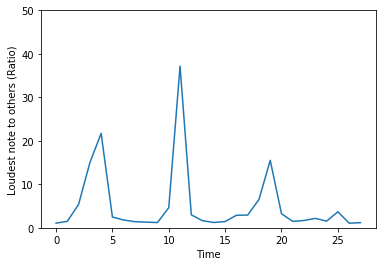

In [205]:
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-2][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

Text(0.5,0,'Time')

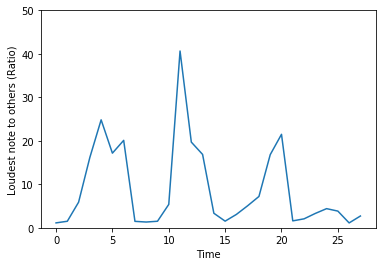

In [206]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-3][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

Text(0.5,0,'Time')

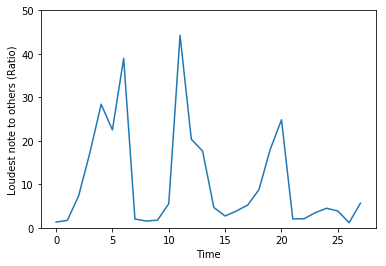

In [207]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-4][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

Text(0.5,0,'Time')

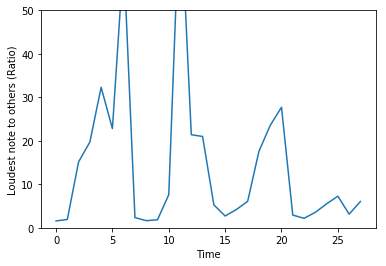

In [208]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-5][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

Text(0.5,0,'Time')

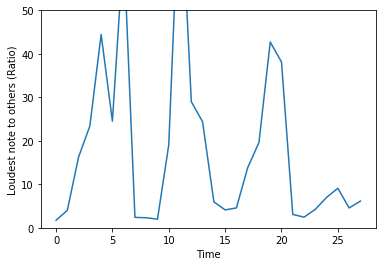

In [209]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-6][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

Text(0.5,0,'Time')

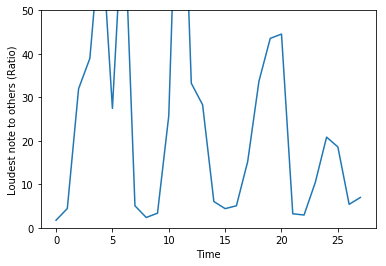

In [210]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-7][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

Text(0.5,0,'Time')

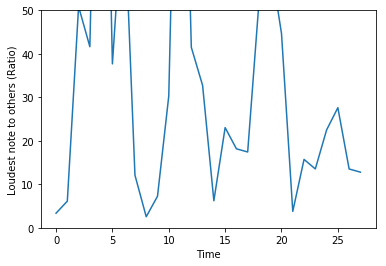

In [211]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-8][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

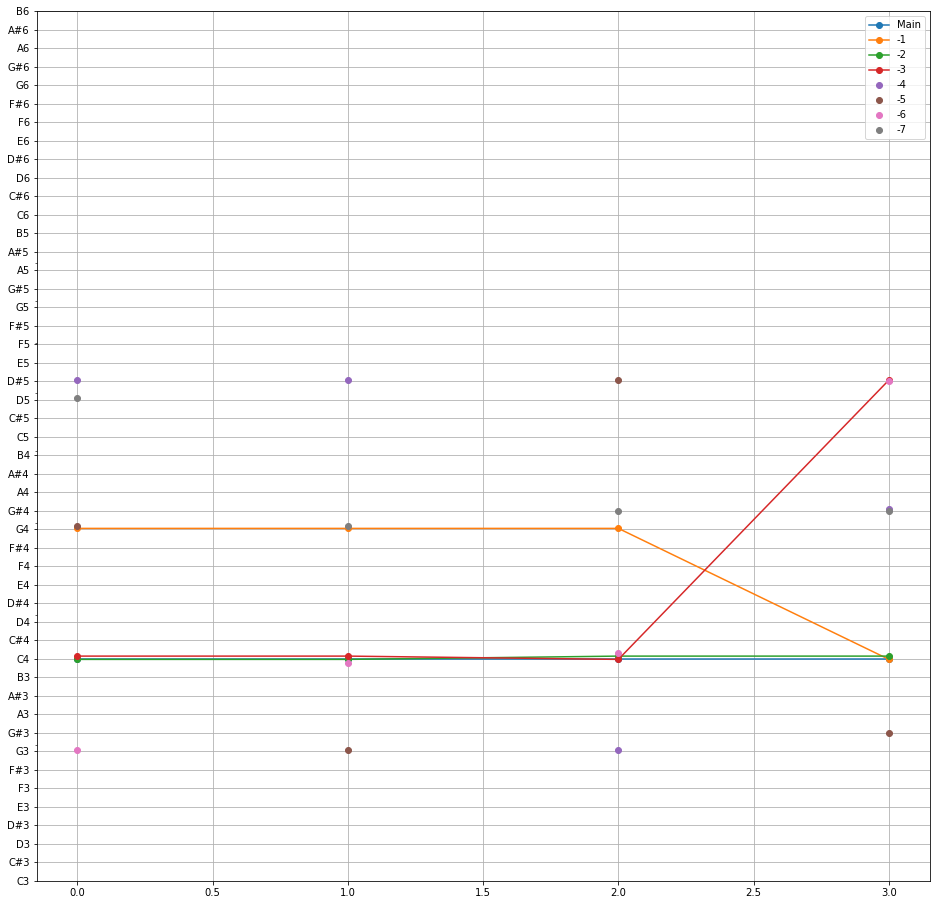

In [85]:
plt.figure(figsize=(16,16))
plt.plot(nf_chords[corr_chords.argmax(axis=0)][1:-2], 'o-', label='Main')
plt.plot(freq_chords[argsort_chords[-1]][1:-2], 'o-', label='-1')
plt.plot(freq_chords[argsort_chords[-2]][1:-2], 'o-', label='-2')
plt.plot(freq_chords[argsort_chords[-3]][1:-2], 'o-', label='-3')
plt.plot(freq_chords[argsort_chords[-4]][1:-2], 'o', label='-4')
plt.plot(freq_chords[argsort_chords[-5]][1:-2], 'o', label='-5')
plt.plot(freq_chords[argsort_chords[-6]][1:-2], 'o', label='-6')
plt.plot(freq_chords[argsort_chords[-7]][1:-2], 'o', label='-7')
# plt.plot(freq_chords[argsort_chords[-8]][1:-2], 'o', label='-8')
# plt.plot(freq_chords[argsort_chords[-9]][1:-2], 'o', label='-9')
# plt.plot(freq_chords[argsort_chords[-10]][1:-2], 'o', label='-10')
# plt.plot(freq_chords[argsort_chords[-11]][1:-2], 'o', label='-11')

plt.legend()
plt.gca().set_yscale("log")
plt.yticks(frequencies('C3', 'C7'),
           note_names('C3', 'C7'))
# plt.xlim(1,11)
plt.gca().grid(True)
plt.gca().set_aspect('auto')

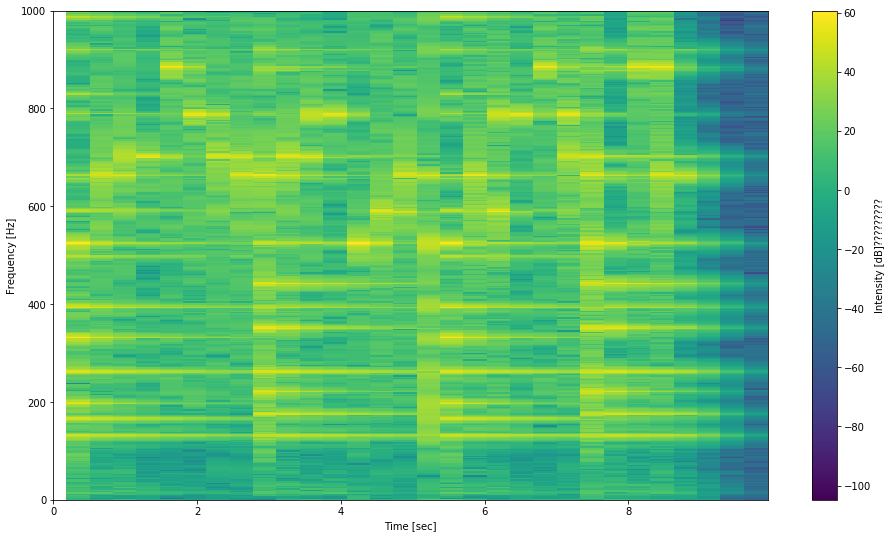

In [126]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_piano, freq_piano, 10*np.log10(spectrogram_piano))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_piano[-1])
plt.ylim(0,1000)
plt.colorbar().set_label('Intensity [dB]?????????')
plt.gca().set_aspect('auto')
plt.show()

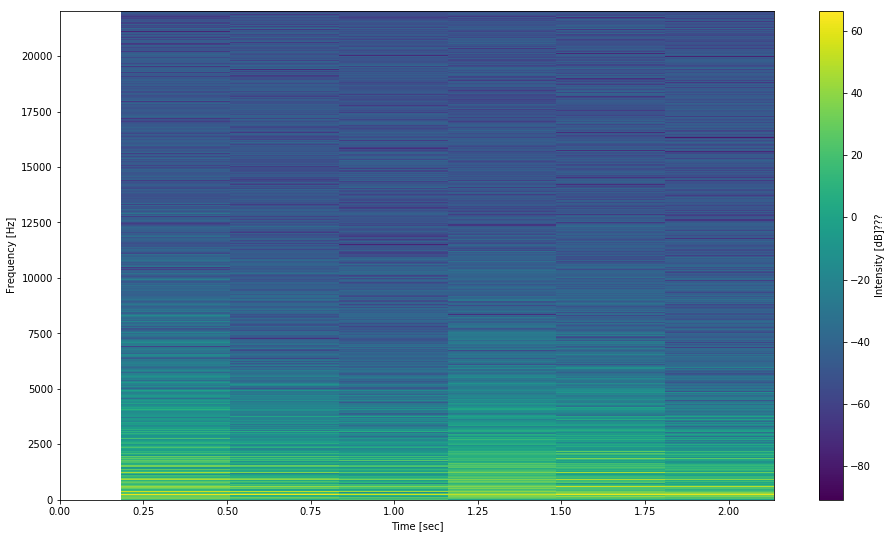

In [125]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_chords, freq_chords, 10*np.log10(spectrogram_chords))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_chords[-1])
# plt.ylim(0,1000)
plt.colorbar().set_label('Intensity [dB]???')
plt.gca().set_aspect('auto')
plt.show()

(array([4., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 16261.44792564,  32116.67942274,  47971.91091983,  63827.14241693,
         79682.37391403,  95537.60541113, 111392.83690823, 127248.06840533,
        143103.29990243, 158958.53139953, 174813.76289663, 190668.99439373,
        206524.22589083, 222379.45738793, 238234.68888503, 254089.92038213,
        269945.15187922, 285800.38337632, 301655.61487342, 317510.84637052,
        333366.07786762, 349221.30936472, 365076.54086182, 380931.77235892,
        396787.00385602, 412642.23535312]),
 <a list of 25 Patch objects>)

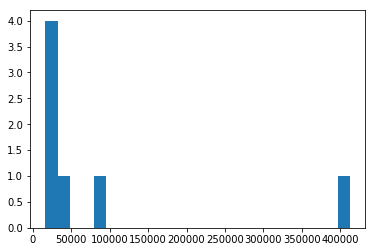

In [141]:
plt.hist(spectrogram_guitar[:,4][spectrogram_guitar[:,4]>1.6e04], 25)